# Nicolas Goasguen - Projet/Atelier API Rest

In [1]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime, date
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

# Stars by birthyear

In [2]:
year = 1860
dfStarsByBirthyear = pd.read_json(f'http://localhost:8000/stars/by_birthyear/{year}')
dfStarsByBirthyear.set_index('id', inplace=True)
dfStarsByBirthyear

,name,birthdate
id,,
294019,Al Fremont,1860-01-01
294058,Charles K. French,1860-01-01
828381,Edwin Stevens,1860-01-01
280605,Emily Fitzroy,1860-01-01
547975,George F. Marion,1860-01-01
269493,George Fawcett,1860-01-01
624735,James Neill,1860-01-01
486041,Lillian Langdon,1860-01-01
931460,Percy Williams,1860-01-01


# Movies by title part

In [3]:
fragment = 'oui'
dfMoviesByTitleParts = pd.read_json(f"http://localhost:8000/movies/by_title_part?t={fragment}")
dfMoviesByTitleParts

,title,year,duration,id
0,Lady from Louisiana,1941,82,33808
1,oui,2020,120,12771925
2,oui,2020,120,12771926
3,The St. Louis Bank Robbery,1959,89,52862
4,Thelma & Louise,1991,130,103074


# Stats by actor

In [4]:
min_count = 30

statsByActor_response = requests.get(f"http://localhost:8000/stars/stats_movie_by_actor/?min_count={min_count}")
statsByActor_json = statsByActor_response.json()
statsByActor_flatten = [ 
    {**stats_dict['actor'], 
     'movie_count': stats_dict['movie_count'], 
     'first_movie': stats_dict['first_movie'], 
     'last_movie': stats_dict['last_movie'] }
     for stats_dict in statsByActor_json ]
dfStatsMovieByActor = pd.DataFrame(statsByActor_flatten)
dfStatsMovieByActor.set_index('id', inplace=True)
dfStatsMovieByActor

,name,birthdate,movie_count,first_movie,last_movie
id,,,,,
78,John Wayne,1907-05-26,172,1926,1976
1230,Harrison Ford,1884-03-16,86,1915,1932
230,Sylvester Stallone,1946-07-06,73,1969,2019
125,Sean Connery,1930-08-25,73,1954,2012
158,Tom Hanks,1956-07-09,69,1980,2020
241,Jean-Claude Van Damme,1960-10-18,66,1979,2019
142,Clint Eastwood,1930-05-31,63,1955,2018
148,Harrison Ford,1942-07-13,63,1966,2020
216,Arnold Schwarzenegger,1947-07-30,56,1970,2019


# Films by year repartition

In [5]:
dfMoviesByYearRepartition = pd.read_json("http://localhost:8000/movies/stats_count_by_year")[['year', 'movie_count']]
dfMoviesByYearRepartition.set_index('year', inplace=True)
dfMoviesByYearRepartition

,movie_count
year,
1915,1
1916,1
1917,7
1918,10
1919,10
...,...
2016,15
2017,22
2018,20


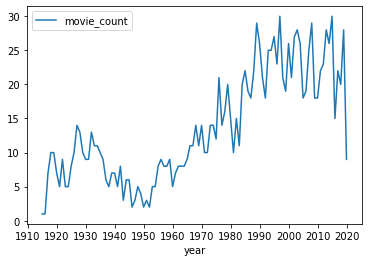

In [6]:
fig, ax = plt.subplots(1,1)
dfMoviesByYearRepartition.plot(ax=ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

# Actors by year repartition

In [7]:
limit = requests.get("http://localhost:8000/stars/count").json()
dfStars = pd.read_json(f'http://localhost:8000/stars?limit={limit}', convert_dates=['birthdate'])
dfStars.set_index('id', inplace=True)
dfStars

,name,birthdate
id,,
1,Fred Astaire,1899-01-01
2,Lauren Bacall,1924-01-01
3,Brigitte Bardot,1934-01-01
4,John Belushi,NaT
6,Ingrid Bergman,1915-01-01
...,...,...
11722275,Joel Newsom,NaT
11749099,Elizabeth Alexander,NaT
11749100,Hans Van Buhofer,NaT


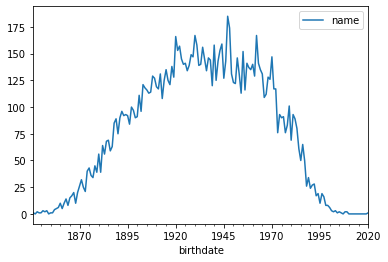

In [8]:
dfActorsByYearRepartition = dfStars.groupby(pd.Grouper(key='birthdate', freq='Y')).count()
dfActorsByYearRepartition.plot()

# Bar diagrams on top 10 actors

In [9]:
dfStatsMovieByActorTop10 = dfStatsMovieByActor[:10]
dfStatsMovieByActorTop10

,name,birthdate,movie_count,first_movie,last_movie
id,,,,,
78,John Wayne,1907-05-26,172,1926,1976
1230,Harrison Ford,1884-03-16,86,1915,1932
230,Sylvester Stallone,1946-07-06,73,1969,2019
125,Sean Connery,1930-08-25,73,1954,2012
158,Tom Hanks,1956-07-09,69,1980,2020
241,Jean-Claude Van Damme,1960-10-18,66,1979,2019
142,Clint Eastwood,1930-05-31,63,1955,2018
148,Harrison Ford,1942-07-13,63,1966,2020
216,Arnold Schwarzenegger,1947-07-30,56,1970,2019


## Graphe nombre

In [10]:
dfTop10ActorsMovieCount = dfStatsMovieByActorTop10[['name', 'movie_count']].set_index('name')
dfTop10ActorsMovieCount

,movie_count
name,
John Wayne,172
Harrison Ford,86
Sylvester Stallone,73
Sean Connery,73
Tom Hanks,69
Jean-Claude Van Damme,66
Clint Eastwood,63
Harrison Ford,63
Arnold Schwarzenegger,56


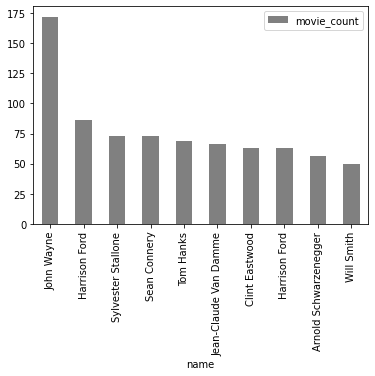

In [11]:
fig1, ax1 = plt.subplots()
dfTop10ActorsMovieCount.plot(kind="bar", ax=ax1, color='grey')

## Graphe années min/max

In [12]:
dfTop10ActorsFirstLastYear = dfStatsMovieByActorTop10[['name', 'first_movie', 'last_movie']].set_index('name')
dfTop10ActorsFirstLastYear

,first_movie,last_movie
name,,
John Wayne,1926,1976
Harrison Ford,1915,1932
Sylvester Stallone,1969,2019
Sean Connery,1954,2012
Tom Hanks,1980,2020
Jean-Claude Van Damme,1979,2019
Clint Eastwood,1955,2018
Harrison Ford,1966,2020
Arnold Schwarzenegger,1970,2019


(1900.0, 2025.0)

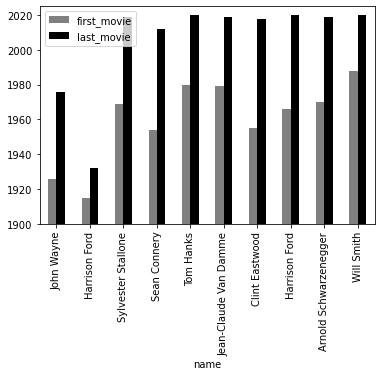

In [13]:
fig2, ax2 = plt.subplots()
dfTop10ActorsFirstLastYear.plot(kind="bar", ax=ax2, color=['grey', 'black'])
ax2.set_ylim(1900, 2025)